> ## Información del problema.

**Contexto:
con casi 40 millones de habitantes y una diversa geografía que engloba la Cordillera de los andes, Lagos glaciares y la Llanura Pampeana, Argentina es el segundo país más grande (por área) y tiene una de las economías más grande en America del Sur. Está politicamente organizada como una federación de 23 provincias y una ciudad autonoma, Buenos Aires.**

**Contenido:
analizaremos diez indicadores económicos y sociales recopilados para cada provincia. Dado que estos indicadores están altamente correlacionados, utilizaremos el análisis de componentes principales (PCA) para reducir redundancias y resaltar patrones que no son evidentes en los datos sin procesar. Después de visualizar los patrones, utilizaremos Clustering por k-means para dividir las provincias en grupos con niveles de desarrollo similares.**

> ## Recolección de datos.

* Link: https://www.kaggle.com/datasets/kingabzpro/argentina-provincial-data

In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display 
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.io as pio;pio.templates.default='plotly_dark'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/argentina-provincial-data/argentina.csv


> ## Análisis exploratorio.

In [2]:
df = pd.read_csv("/kaggle/input/argentina-provincial-data/argentina.csv")

In [3]:
df.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [4]:
df.shape

(22, 11)

In [5]:
df.columns.values

array(['province', 'gdp', 'illiteracy', 'poverty', 'deficient_infra',
       'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
       'movie_theatres_per_cap', 'doctors_per_cap'], dtype=object)

In [6]:
df.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
dtype: object

In [7]:
df.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              22 non-null     float64
 3   poverty                 22 non-null     float64
 4   deficient_infra         22 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           22 non-null     float64
 7   birth_mortal            22 non-null     float64
 8   pop                     22 non-null     int64  
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [10]:
for var in df.columns:
    print()
    print(var)
    print(df[var].unique())
    print(df[var].nunique())


province
['Buenos Aires' 'Catamarca' 'Córdoba' 'Corrientes' 'Chaco' 'Chubut'
 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja' 'Mendoza' 'Misiones'
 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis' 'Santa Cruz'
 'Santa Fe' 'Santiago del Estero' 'Tucumán']
22

gdp
[2.92689868e+08 6.15094916e+06 6.93637392e+07 7.96801298e+06
 9.83264267e+06 1.77478542e+07 2.07434091e+07 3.80705742e+06
 6.48493833e+06 6.99026246e+06 5.59051563e+06 3.34313691e+07
 9.64682583e+06 2.25641062e+07 1.02645844e+07 1.34388349e+07
 8.26230857e+06 1.17808494e+07 1.16637380e+07 8.15886903e+07
 8.38785873e+06 1.38561989e+07]
22

illiteracy
[1.38324  2.34414  2.71414  5.60242  7.51758  1.54806  3.18558  4.61064
 2.15139  1.5393   2.77321  2.2002   6.86395  1.94375  2.03142  3.34609
 2.96326  3.43365  0.791485 1.97594  6.27209  3.77037 ]
22

poverty
[ 8.16779764  9.23409512  5.38238027 12.74719066 15.86261922  8.0517522
  7.2887511  17.03558321 13.36796514  3.3987737  10.87515183  5.69279843
 13.52978759  9.456

In [11]:
df.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.055703e+07,3.225541,9.925625,12.677304,1.724866,50.768836,4.986364,1.686352e+06,0.000007,0.004894
std,6.183100e+07,1.851496,3.779530,7.216860,1.152438,9.181037,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.041587e+06,1.989810,7.472754,7.569677,0.812617,45.548300,3.025000,5.143715e+05,0.000004,0.004061
50%,1.096416e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,1.999452e+07,3.686190,12.500143,16.100647,2.514496,56.915800,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


### Análisis del dataset.
* #### El dataset contiene 22 filas/observaciones y 11 columnas/variables.
* #### Tiene 10 variables numéricas y 1 variable categórica.
* #### No tiene valores nulos ni filas duplicadas.

<Axes: >

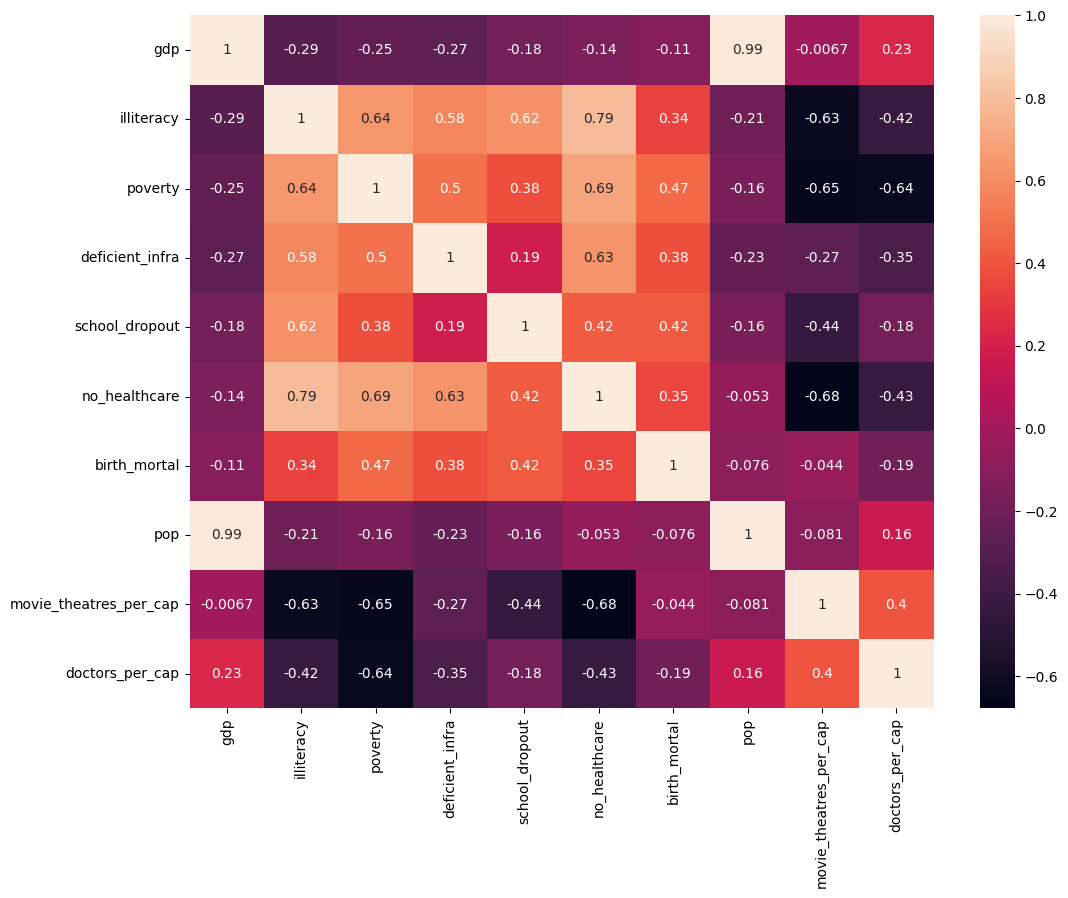

In [12]:
corr_mat = df.drop(["province"],axis=1).corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corr_mat, annot=True)

> ## Normalizar el dataset

In [13]:
X = df.drop(["province"],axis=1)
Y = df["province"]

In [14]:
X_std = (X - X.min())/(X.max() - X.min())
X_std.head()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,1.000000,0.087979,0.349717,0.060493,0.153565,0.534782,0.233766,1.000000,0.247140,0.273887
1,0.008114,0.230840,0.427910,0.239678,0.204326,0.432293,0.045455,0.006114,0.213094,0.228535
2,0.226932,0.285850,0.145460,0.238651,0.227028,0.451932,0.259740,0.197700,0.551096,1.000000
3,0.014404,0.715264,0.685528,0.492010,1.000000,0.898790,0.331169,0.046813,0.130282,0.227608
4,0.020858,1.000000,0.913985,1.000000,0.648431,0.991739,0.435065,0.050895,0.060446,0.106517


> ## Análisis de componentes principales

In [15]:
pca = PCA()
Y = pca.fit_transform(X_std)

In [16]:
Y

array([[-5.65647173e-01,  1.18665906e+00, -2.09880413e-01,
         2.80507110e-01, -1.14045085e-01, -1.36252990e-01,
        -3.92709614e-02, -1.07426146e-02,  3.56657668e-03,
        -4.73927158e-03],
       [-2.29116553e-01, -8.12549172e-02, -1.49708562e-01,
        -2.79975183e-01, -4.06144373e-02, -8.27578737e-03,
         8.58614393e-02,  2.24334060e-02, -6.63390539e-02,
        -4.16847318e-03],
       [-5.88396965e-01,  6.42446181e-02,  1.76015139e-01,
         2.31834002e-01,  4.12224045e-01,  3.78533127e-01,
        -3.43017482e-02,  1.59713190e-01,  6.52849412e-02,
         7.51068611e-04],
       [ 7.43029480e-01,  4.81441371e-02,  3.07914561e-01,
        -2.52153687e-02,  1.20673105e-01, -6.48442221e-02,
         1.90162002e-02, -4.27305466e-02,  1.11016829e-01,
        -1.37387332e-02],
       [ 1.09626852e+00, -3.39654105e-02, -2.46626804e-01,
         1.72216783e-01,  2.68231100e-01, -9.73880122e-02,
         2.74351420e-02,  1.68382917e-01,  2.02705121e-02,
         1.

In [17]:
pca.explained_variance_

array([3.06056814e-01, 9.25921612e-02, 7.78602342e-02, 5.66343710e-02,
       4.30035095e-02, 2.22543116e-02, 1.55625691e-02, 1.06150149e-02,
       8.65009230e-03, 1.37013882e-04])

In [18]:
# Examinar los vectores propios con todas las componentes principales.
eigenvectors = pca.components_
eigenvectors_df = pd.DataFrame(eigenvectors, columns=X_std.columns,
                      index=["Componente %s"%i for i in range(1,11)])
print("\t"*6+"------------Autovectores------------")
print()
display(eigenvectors_df)

						------------Autovectores------------



,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
Componente 1,-0.129448,0.448316,0.422607,0.309573,0.381189,0.391793,0.205165,-0.094485,-0.335157,-0.213697
Componente 2,0.627289,0.019009,0.035738,-0.197984,0.076100,0.134847,-0.077841,0.634886,-0.361988,0.039023
Componente 3,-0.046537,0.065237,-0.259312,-0.371130,0.809301,-0.186353,0.136643,-0.071939,0.073769,0.263847
Componente 4,0.243368,-0.082110,-0.011886,0.403396,0.021566,0.021463,0.689956,0.226617,0.472373,0.140371
Componente 5,0.030184,0.326905,-0.512906,0.471772,-0.002026,0.256752,-0.358680,0.008159,-0.002909,0.460357
Componente 6,-0.151311,-0.115266,0.240505,-0.253730,-0.258568,0.223773,0.297047,-0.136493,-0.301772,0.725763
Componente 7,0.038949,-0.566447,0.185995,0.520914,0.267303,-0.358453,-0.154462,-0.052771,-0.349023,0.152560
Componente 8,0.070822,0.573746,0.335192,0.051330,-0.132508,-0.681399,-0.063924,0.077076,0.050703,0.237383
Componente 9,0.060768,-0.124629,0.533487,-0.048192,0.192258,0.288554,-0.460619,0.063583,0.559088,0.211720
Componente 10,0.703084,0.043839,0.016475,-0.035282,-0.025248,0.032752,0.011577,-0.707104,0.003717,-0.019520


In [19]:
# Examinar los valores propios (autovalores)
eigenvalues = pca.explained_variance_
print("Valores propios (Autovalores):")
print(eigenvalues)

Valores propios (Autovalores):
[3.06056814e-01 9.25921612e-02 7.78602342e-02 5.66343710e-02
 4.30035095e-02 2.22543116e-02 1.55625691e-02 1.06150149e-02
 8.65009230e-03 1.37013882e-04]


In [20]:
# Visualizar la varianza explicada acumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
data = []
plot1 = go.Bar(x=["Componente Principal %s"%i for i in range(1,11)],
              y=explained_variance_ratio,
              showlegend=False)
plot2 = go.Scatter(x=["Componente Principal %s"%i for i in range(1,11)],
                  y=cumulative_variance,
                  showlegend=True,
                  name="% de varianza explicada acumulada")

data.append(plot1)
data.append(plot2)

layout = go.Layout(xaxis=go.layout.XAxis(title="Componentes principales"),
                  yaxis=go.layout.YAxis(title="Porcentaje de varianza explicada"),
                  title="Porcentaje de variabilidad explicada para cada componente principal")

fig = go.Figure(data, layout)
fig.show()

* #### Con las primeras 3 componentes principales explicarían un 75% de la varianza de los datos. Nos quedamos con dichos componentes únicamente.

In [21]:
pca = PCA(n_components=3)
pca.fit(X_std)
Y = pca.fit_transform(X_std)
print(X_std.shape, Y.shape)

(22, 10) (22, 3)


In [22]:
# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=Y, columns=["Componente 1", "Componente 2", "Componente 3"], index=df["province"])
pca_df

,Componente 1,Componente 2,Componente 3
province,,,
Buenos Aires,-0.565647,1.186659,-0.209880
Catamarca,-0.229117,-0.081255,-0.149709
Córdoba,-0.588397,0.064245,0.176015
Corrientes,0.743029,0.048144,0.307915
Chaco,1.096269,-0.033965,-0.246627
Chubut,-0.631505,-0.292589,-0.100056
Entre Ríos,-0.004100,-0.055260,-0.012918
Formosa,0.979338,-0.118964,-0.241457
Jujuy,0.074103,-0.004725,-0.366926


In [23]:
# Examinar los vectores propios para las 3 primeras componentes principales.
eigenvectors = pca.components_
df_comp = pd.DataFrame(eigenvectors, columns=X_std.columns,
                      index=["Componente 1", "Componente 2", "Componente 3"])

print("\t"*6+"------------Autovectores------------")
print()
display(df_comp)

						------------Autovectores------------



,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
Componente 1,-0.129448,0.448316,0.422607,0.309573,0.381189,0.391793,0.205165,-0.094485,-0.335157,-0.213697
Componente 2,0.627289,0.019009,0.035738,-0.197984,0.076100,0.134847,-0.077841,0.634886,-0.361988,0.039023
Componente 3,-0.046537,0.065237,-0.259312,-0.371130,0.809301,-0.186353,0.136643,-0.071939,0.073769,0.263847


In [24]:
# Calcular la proporción de varianza explicada por cada componente
proportion_explained_variance = explained_variance_ratio / cumulative_variance

# Crear un DataFrame que relacione las componentes con las características originales y sus importancias
relation_components_characteristics = pd.DataFrame({
    "Componente": ["Componente " + str(i) for i in range(1, len(X_std.columns) + 1)],
    "Característica": X_std.columns,
    "Importancia": proportion_explained_variance
})

# Ordenar las filas por importancia descendente
relation_components_characteristics = relation_components_characteristics.sort_values(by="Importancia", ascending=False)

# Mostrar la relación ordenada
display(relation_components_characteristics)

,Componente,Característica,Importancia
0,Componente 1,gdp,1.000000
1,Componente 2,illiteracy,0.232265
2,Componente 3,poverty,0.163397
3,Componente 4,deficient_infra,0.106227
4,Componente 5,school_dropout,0.074640
5,Componente 6,no_healthcare,0.037190
6,Componente 7,birth_mortal,0.025348
7,Componente 8,pop,0.016995
8,Componente 9,movie_theatres_per_cap,0.013660
9,Componente 10,doctors_per_cap,0.000216


* #### La variable "gdp" (producto interno bruto por dolar) tiene mayor influencia sobre el componente 1. El alto autovalor de la componente 1 indica que esta componente explica una cantidad significativa de la varianza total en tus datos. A pesar de que "gdp" no tiene una gran influencia como autovector en la dirección específica de la componente 1, aún puede contribuir a la varianza total en la dirección de todas las componentes. Esto significa que "gdp" puede tener un impacto en la varianza general de los datos, pero no necesariamente está asociado directamente con la estructura específica de la componente 1.
* #### La variable "illiteracy" (analfabetismo) tiene mayor influencia sobre el componente 2.
* #### La variable "poverty" (pobreza) tiene mayor influencia sobre el componente 3.

In [25]:
df['Componente 1'] = Y[:,0]
df['Componente 2'] = Y[:,1]
df['Componente 3'] = Y[:,2]

fig = px.scatter_3d(df, x='Componente 1', y='Componente 2'
                    ,z='Componente 3',
                    color='province',
                    hover_data=['province'],
                    opacity=0.5)
fig.update_layout(title='PCA 3D')
fig.show()

> ## Clustering (K-Means)

### Obtener la cantidad óptima de clusters.
* ### Método del codo.

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10).fit(pca_df) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

k_values = np.arange(1,10)

fig = go.Figure(data=go.Scatter(x=k_values, y=inertias, mode='lines+markers'))

fig.update_layout(
    title='Método del Codo para Determinar el Número Óptimo de Clusters',
    xaxis=dict(title='Número de Clusters'),
    yaxis=dict(title='Inercia')    
)

fig.update_traces(marker=dict(size=15))

fig.show()

* ### Método de la silueta.

*Para cada k =  2  el promedio de la silueta es de:  0.46149262534252317
 - Para i =  1  la silueta del cluster vale:  0.4180564213674367
 - Para i =  2  la silueta del cluster vale:  0.5773225026094204


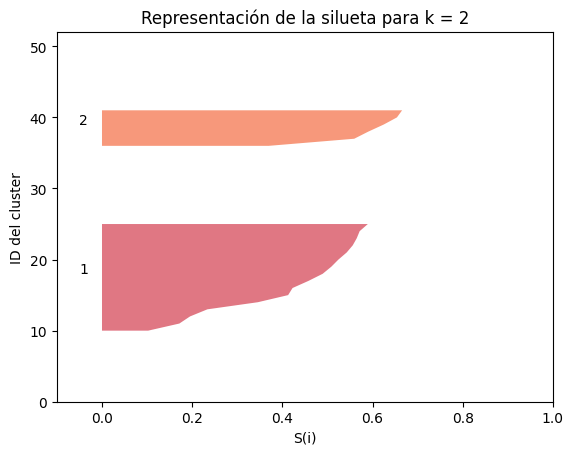

*Para cada k =  3  el promedio de la silueta es de:  0.47534927507248936
 - Para i =  1  la silueta del cluster vale:  0.560761825234408
 - Para i =  2  la silueta del cluster vale:  0.47287420667922114
 - Para i =  3  la silueta del cluster vale:  0.0


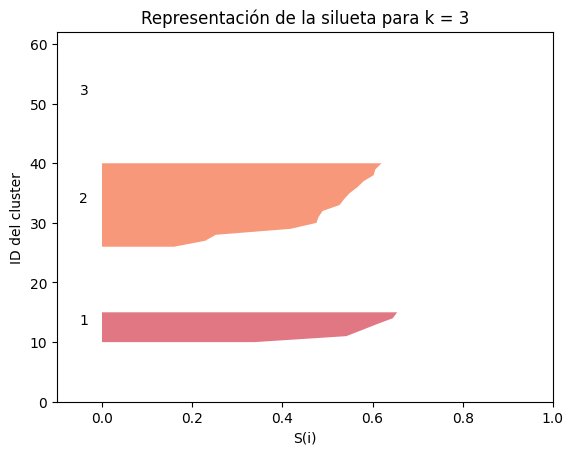

*Para cada k =  4  el promedio de la silueta es de:  0.3688062562577061
 - Para i =  1  la silueta del cluster vale:  0.3962692120448377
 - Para i =  2  la silueta del cluster vale:  0.5045225846126641
 - Para i =  3  la silueta del cluster vale:  0.31832048016492714
 - Para i =  4  la silueta del cluster vale:  0.0


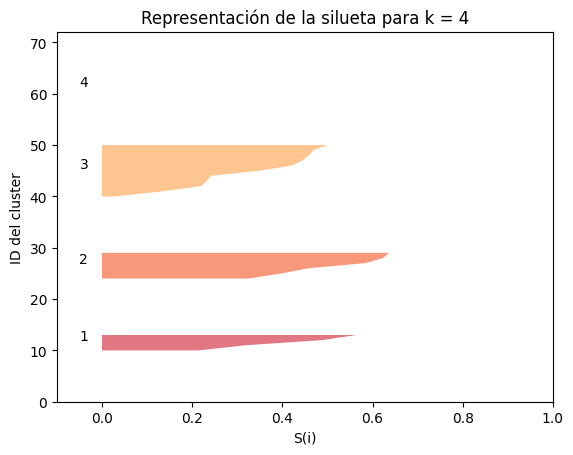

*Para cada k =  5  el promedio de la silueta es de:  0.372608727072994
 - Para i =  1  la silueta del cluster vale:  0.333803737475965
 - Para i =  2  la silueta del cluster vale:  0.4413895505811298
 - Para i =  3  la silueta del cluster vale:  0.43498541070917995
 - Para i =  4  la silueta del cluster vale:  0.3175308851210461
 - Para i =  5  la silueta del cluster vale:  0.0


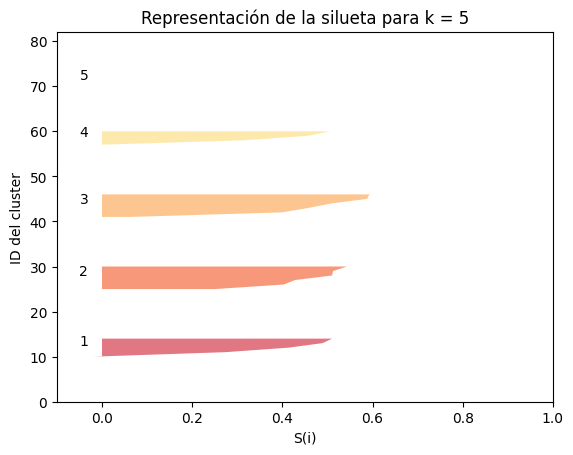

*Para cada k =  6  el promedio de la silueta es de:  0.354306664141454
 - Para i =  1  la silueta del cluster vale:  0.3233208533373592
 - Para i =  2  la silueta del cluster vale:  0.74553985777682
 - Para i =  3  la silueta del cluster vale:  0.0
 - Para i =  4  la silueta del cluster vale:  0.42792633681912884
 - Para i =  5  la silueta del cluster vale:  0.3504670505352519
 - Para i =  6  la silueta del cluster vale:  0.23849839249430083


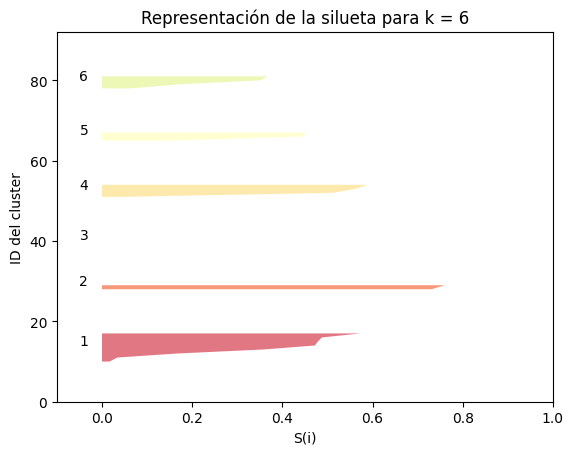

*Para cada k =  7  el promedio de la silueta es de:  0.40216383098662367
 - Para i =  1  la silueta del cluster vale:  0.8236600043972682
 - Para i =  2  la silueta del cluster vale:  0.3764731667786751
 - Para i =  3  la silueta del cluster vale:  0.1742811988169524
 - Para i =  4  la silueta del cluster vale:  0.2700910762597969
 - Para i =  5  la silueta del cluster vale:  0.0
 - Para i =  6  la silueta del cluster vale:  0.7367955420703872
 - Para i =  7  la silueta del cluster vale:  0.4767847728604886


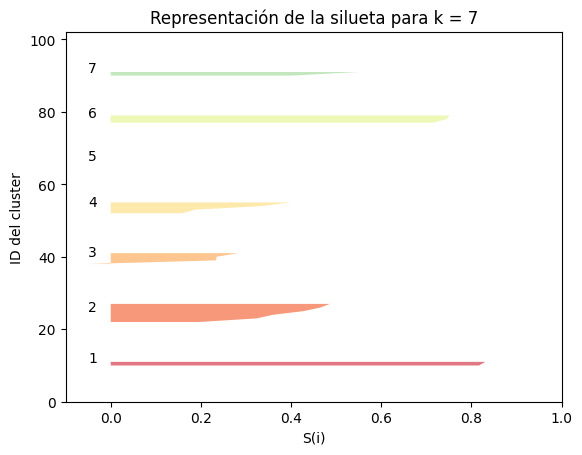

*Para cada k =  8  el promedio de la silueta es de:  0.4649765885108671
 - Para i =  1  la silueta del cluster vale:  0.3102608609780293
 - Para i =  2  la silueta del cluster vale:  0.46507202561127564
 - Para i =  3  la silueta del cluster vale:  0.2949384129028858
 - Para i =  4  la silueta del cluster vale:  0.0
 - Para i =  5  la silueta del cluster vale:  0.5278840973601059
 - Para i =  6  la silueta del cluster vale:  0.7293794385867236
 - Para i =  7  la silueta del cluster vale:  0.8112870945427699
 - Para i =  8  la silueta del cluster vale:  0.7187543615981575


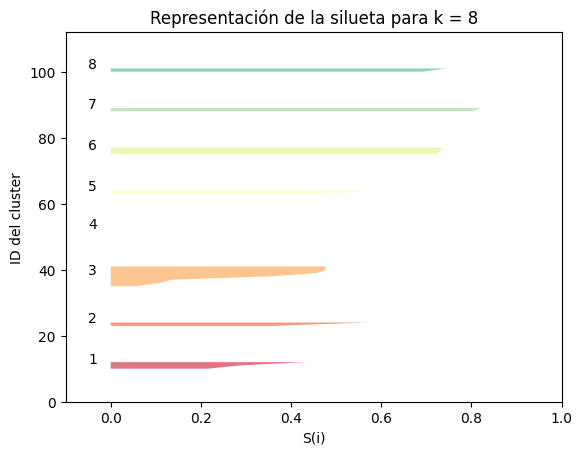

*Para cada k =  9  el promedio de la silueta es de:  0.42495970393228705
 - Para i =  1  la silueta del cluster vale:  0.7187543615981575
 - Para i =  2  la silueta del cluster vale:  0.2830616302964175
 - Para i =  3  la silueta del cluster vale:  0.2625017876512729
 - Para i =  4  la silueta del cluster vale:  0.0
 - Para i =  5  la silueta del cluster vale:  0.5278840973601059
 - Para i =  6  la silueta del cluster vale:  0.31699550600820786
 - Para i =  7  la silueta del cluster vale:  0.7250252502316478
 - Para i =  8  la silueta del cluster vale:  0.0
 - Para i =  9  la silueta del cluster vale:  0.8112870945427699


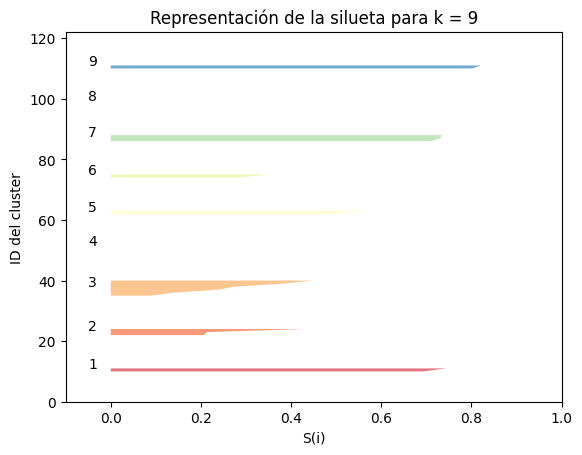

In [27]:
color_palette = [plt.cm.Spectral(float(i)/10) for i in range(1,10)]

for k in range(1,10):
    kmeanmodel = KMeans(n_clusters=k, n_init=9).fit(pca_df)
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    labels = kmeanmodel.labels_
    
    if 1<k<len(pca_df):
        _,axis1 = plt.subplots(1,1)
        
        axis1.set_xlim([-0.1,1.0])
        axis1.set_ylim([0, len(pca_df)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(pca_df,labels)
        print("*Para cada k = ",k," el promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(pca_df,labels)
        
        y_lower = 10
        for i in range(k):
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print(" - Para i = ",i+1,
                 " la silueta del cluster vale: ",
                 np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0 ,ith_cluster_sv,
                                facecolor=color, alpha=0.7)
            
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            y_lower = y_upper + 10
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        plt.show()

* ### Por el método del codo y del coeficiente de la silueta considero que 2 clusters es la cantidad optima.

In [28]:
pca_kmean = pca_df.reset_index(drop=True)

In [29]:
kmean = KMeans(n_clusters=2, n_init=10).fit_predict(pca_kmean)

In [30]:
clust_k = pd.Series(kmean)

In [31]:
data_clust_k = pca_kmean.copy()

In [32]:
data_clust_k["clust_k"] = clust_k
data_clust_k.insert(0, 'Provincias', pca_df.index)
data_clust_k

,Provincias,Componente 1,Componente 2,Componente 3,clust_k
0,Buenos Aires,-0.565647,1.186659,-0.209880,0
1,Catamarca,-0.229117,-0.081255,-0.149709,0
2,Córdoba,-0.588397,0.064245,0.176015,0
3,Corrientes,0.743029,0.048144,0.307915,1
4,Chaco,1.096269,-0.033965,-0.246627,1
5,Chubut,-0.631505,-0.292589,-0.100056,0
6,Entre Ríos,-0.004100,-0.055260,-0.012918,0
7,Formosa,0.979338,-0.118964,-0.241457,1
8,Jujuy,0.074103,-0.004725,-0.366926,0
9,La Pampa,-0.683600,-0.465075,-0.153768,0


In [33]:
print("Provincias que pertenecen al cluster 0")
data_clust_k[data_clust_k["clust_k"]==0]["Provincias"]

Provincias que pertenecen al cluster 0


0     Buenos Aires
1        Catamarca
2          Córdoba
5           Chubut
6       Entre Ríos
8            Jujuy
9         La Pampa
10        La Rioja
11         Mendoza
13         Neuquén
14       Río Negro
16        San Juan
17        San Luis
18      Santa Cruz
19        Santa Fe
21         Tucumán
Name: Provincias, dtype: object

In [34]:
print("Provincias que pertenecen al cluster 1")
data_clust_k[data_clust_k["clust_k"]==1]["Provincias"]

Provincias que pertenecen al cluster 1


3              Corrientes
4                   Chaco
7                 Formosa
12               Misiones
15                  Salta
20    Santiago del Estero
Name: Provincias, dtype: object

In [35]:
display(data_clust_k.groupby("clust_k").describe().stack())

Componente 1  Componente 2  Componente 3
clust_k                                                
0       count     16.000000     16.000000     16.000000
        mean      -0.290140     -0.004775      0.024047
        std        0.283388      0.356779      0.288505
        min       -0.722567     -0.465075     -0.366926
        25%       -0.571335     -0.174835     -0.150723
        50%       -0.259881     -0.029992     -0.065778
        75%       -0.053793      0.041226      0.180258
        max        0.074103      1.186659      0.663178
1       count      6.000000      6.000000      6.000000
        mean       0.773706      0.012733     -0.064126
        std        0.238303      0.082133      0.265561
        min        0.425556     -0.118964     -0.287308
        25%        0.675230     -0.020376     -0.245334
        50%        0.744221      0.028785     -0.198399
        75%        0.920857      0.045402      0.139710
        max        1.096269      0.123614      0.307915

In [36]:
fig = px.scatter_3d(data_clust_k, x='Componente 1', y='Componente 2'
                    ,z='Componente 3',
                    color='clust_k',
                    hover_data=['Provincias'],
                    opacity=0.5)

fig.update_layout(title='PCA 3D')

fig.show()